<a href="https://colab.research.google.com/github/NurAyuL27/PCVK_Genap_2025/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install opencv-python scikit-image

**LANGKAH 1**

In [12]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
import requests
from io import BytesIO

**LANGKAH 2**

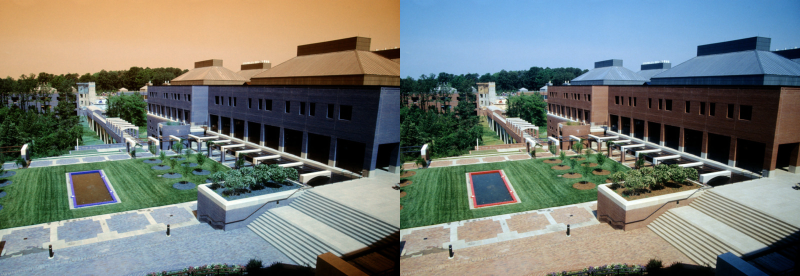

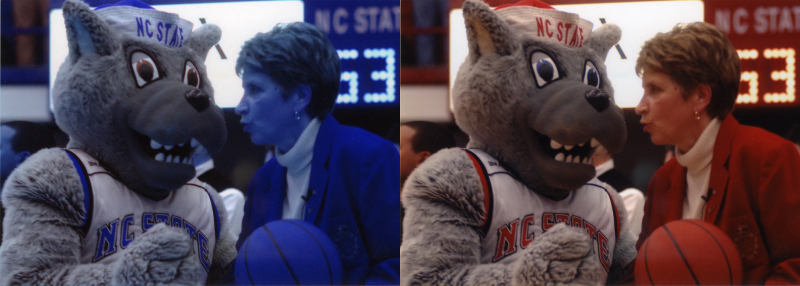

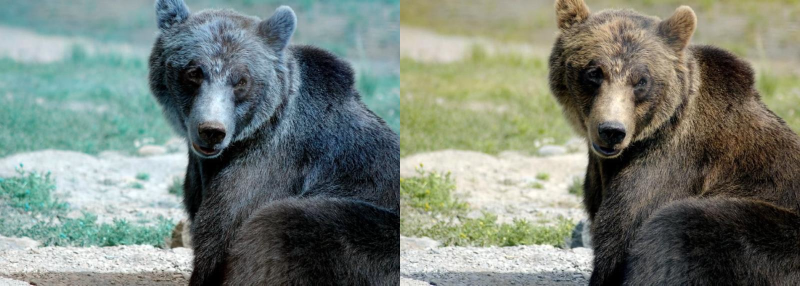

In [16]:

# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://placebear.com/800/571"]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)                                # read image
    image = cv.resize(image, (0,0), fx=0.5, fy=0.5)       # resize image to half size
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)        # convert color to RGB
    final_frame = cv.hconcat((image, image_2))            # concatenate image
    cv2_imshow(final_frame)                               # show image
    print('\n')

**LANGKAH 3**

resolusi image: tinggi x lebar =  286  x  400


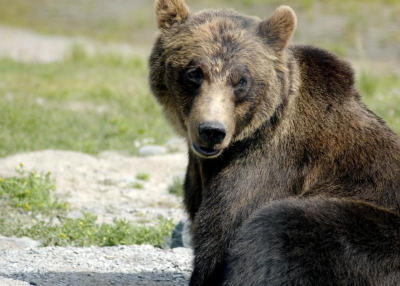

In [17]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ",tinggi," x ",lebar)
cv2_imshow(image_2)

**LANGKAH 4**

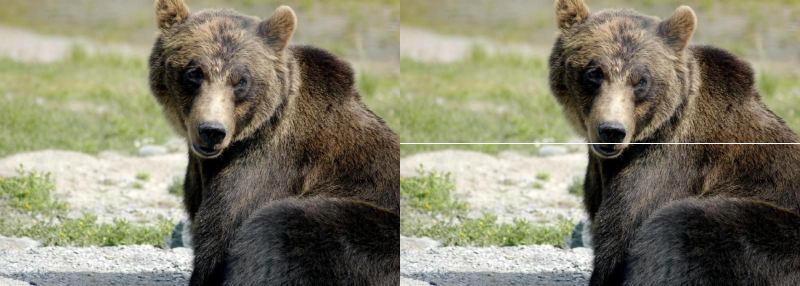

In [19]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

**PERTANYAAN**

1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan menggunakan Google Colab?
- Tidak perlu instalasi software di komputer lokal
- Akses GPU gratis untuk komputasi intensif
- Library sudah terinstal lengkap (OpenCV, scikit-image, dll)
- Mudah berbagi dan berkolaborasi
- Environment konsisten untuk semua mahasiswa
- Visualisasi langsung di browser tanpa konfigurasi tambahan

2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan? Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?
- numpy (np): Untuk operasi matematika dan array multidimensi (wajib)
- pandas (pd): Untuk manipulasi data tabular (opsional)
- cv2 (cv): Untuk pengolahan citra dan computer vision (wajib)
- cv2_imshow: Menampilkan gambar di Colab (wajib pengganti cv2.imshow)
- skimage.io: Membaca gambar dari URL (wajib)
- skimage.transform: Transformasi gambar (opsional)
- PIL.Image: Alternatif processing gambar (opsional)
- matplotlib.pylab (plt): Visualisasi gambar/plot (opsional)

3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut :
image = cv.resize(image, (0,0), fx = 0.5 , fy = 0.5 )
Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak dilakukan?
- Kegunaan kode program tersebut:
- Kode image = cv.resize(image, (0,0), fx=0.5, fy=0.5) berfungsi untuk meresize gambar menjadi setengah ukuran aslinya baik secara lebar (fx=0.5) maupun tinggi (fy=0.5).

- Pengaruhnya jika tidak dilakukan:
- Ukuran gambar tetap besar - gambar akan tetap dalam resolusi original (800px)
- Proses komputasi lebih lambat - membutuhkan lebih banyak memori dan processing power
- Tampilan di Colab mungkin tidak optimal - gambar terlalu besar untuk ditampilkan di notebook
- Gambar hasil concatenate akan sangat lebar - karena menyambung 2 gambar ukuran penuh
- Waktu loading lebih lama - terutama jika menggunakan multiple images

4. Perhatikan potongan kode progam berikut :
membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2),y) = [255,255,255]
Apakah kegunaan kode [255,255,255] ? Jelaskan!
- Kode tersebut digunakan untuk membuat garis horizontal putih di tengah gambar dengan mengubah nilai pixel pada baris tengah menjadi warna putih [255, 255, 255].

5. Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun rendah!
- Pixel adalah titik terkecil dalam gambar digital.
- Resolusi adalah jumlah pixel dalam gambar.
- Resolusi tinggi = lebih banyak pixel = gambar lebih detail tapi ukuran file besar dan proses lebih lambat.
- Resolusi rendah = lebih sedikit pixel = gambar kurang detail tapi ukuran file kecil dan proses lebih cepat.
- Keduanya berhubungan langsung: lebih banyak pixel berarti resolusi lebih tinggi dan kualitas gambar lebih baik.

**TUGAS**

1. Lakukan langkah-langkah praktikum seperti diatas

2. Buat garis vertikal dan garis menyilang diagonal pada image keluaran

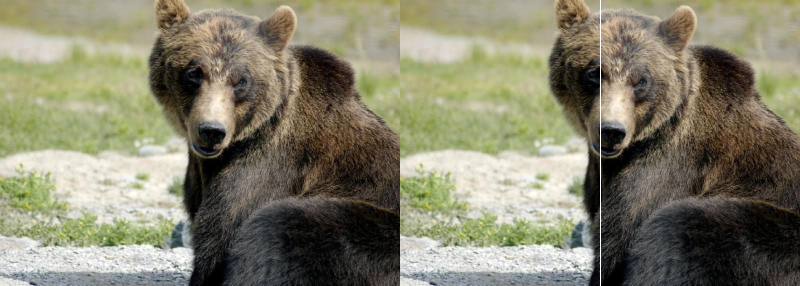

In [29]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for x in range(tinggi):
    image_3[x, int(lebar/2)] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

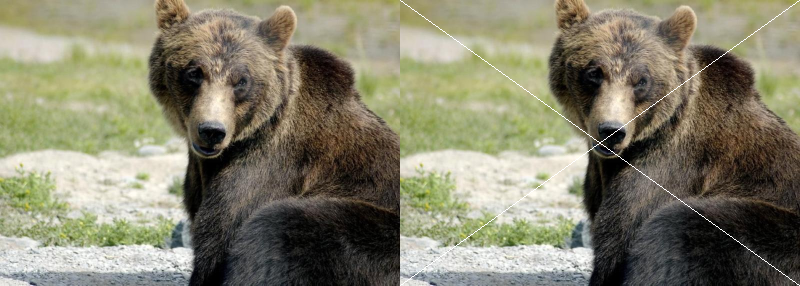

In [32]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dapatkan dimensi gambar
tinggi, lebar = image_3.shape[:2]

# Diagonal kiri-atas → kanan-bawah
for x in range(lebar):
    y = round((tinggi-1) * x / (lebar-1))
    image_3[y, x] = [255, 255, 255]

# Diagonal kiri-bawah → kanan-atas
for x in range(lebar):
    y = (tinggi-1) - round((tinggi-1) * x / (lebar-1))
    image_3[y, x] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

3. Buat garis horisontal berwarna putih dibagian tengah gambar dengan panjang tertentu


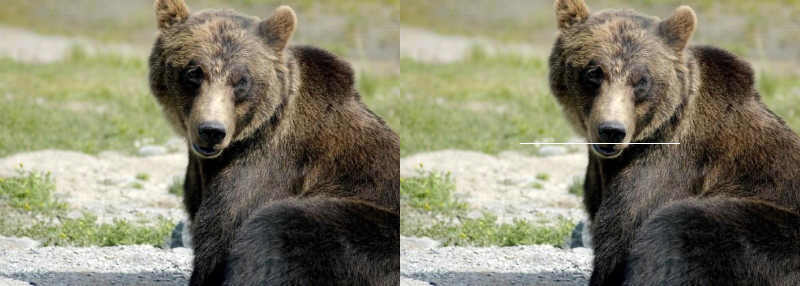

In [35]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dapatkan dimensi gambar
tinggi, lebar = image_3.shape[:2]

# Buat garis horizontal putih di tengah dengan panjang tertentu (misalnya 80% lebar gambar)
panjang_garis = int(lebar * 0.4)  # 40% dari lebar gambar
start_x = int((lebar - panjang_garis) / 2)  # Titik mulai agar garis berada di tengah

# membuat garis horizontal di tengah gambar dengan panjang tertentu
for x in range(start_x, start_x + panjang_garis):
    image_3[int(tinggi/2), x] = [255, 255, 255]  # Warna putih

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

4. Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat dalam gambar

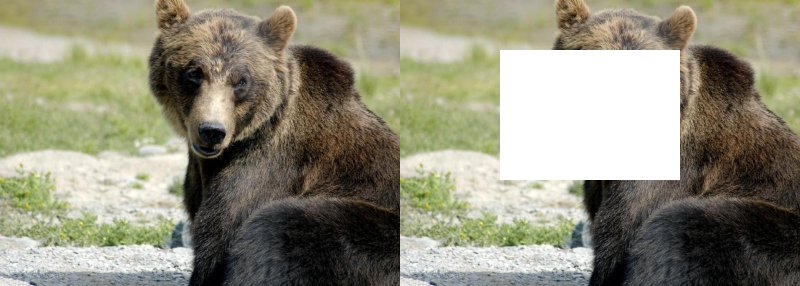

In [38]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dapatkan dimensi gambar
tinggi, lebar = image_3.shape[:2]

# Buat kotak putih di sembarang tempat (misalnya di koordinat x=100, y=50)
# dengan ukuran 200x150 pixel
x_kotak = 100
y_kotak = 50
lebar_kotak = 180
tinggi_kotak = 130

# Isi seluruh area kotak dengan warna putih
for y in range(y_kotak, y_kotak + tinggi_kotak):
    for x in range(x_kotak, x_kotak + lebar_kotak):
        image_3[y, x] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)